In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Research/Fake_News_Detection/English Fake news/final_en.csv")
df

NameError: name 'pd' is not defined

In [ ]:
df.isnull().sum()

title    0
text     0
lebel    0
dtype: int64

In [ ]:
df['lebel'].value_counts()

NameError: name 'df' is not defined

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['lebel']=lb.fit_transform(df['lebel'])

In [ ]:
#merging the news headline and title
df['content_data'] = df['title']+' '+df['text']

NameError: name 'df' is not defined

In [ ]:
!pip install stemming
from stemming.porter2 import stem
df['content_data'] = df['content_data'].apply(stem)

  Preparing metadata (setup.py) ... done
  Created wheel for stemming: filename=stemming-1.0.1-py3-none-any.whl size=11123 sha256=19b241ecc6e51faa1c5905883742266433428790a1c52c7929841cd8b6792308
  Stored in directory: /root/.cache/pip/wheels/c5/f9/3f/8fe1ec182ce66145d7ded39bad9a690960469dc350fbec0181
Successfully built stemming


In [ ]:
X=df['content_data']
Y=df['lebel']

NameError: name 'df' is not defined

In [ ]:
# Import necessary libraries
import gensim
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

# Sample NLP dataset (replace this with your own dataset)
#texts = ["I love natural language processing", "Word2Vec is a powerful tool", "Random Forest is a versatile algorithm", ...]
#labels = [1, 0, 1, ...]  # Binary labels for each text, 1 for positive class, 0 for negative class

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Word2Vec model training
tokenized_texts = [text.split() for text in X_train]
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Function to calculate the average vector for a text
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.

    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector

# Transform the training and testing data into feature vectors
train_vectors = [average_word_vectors(tokens, word2vec_model, word2vec_model.wv.index_to_key, 100) for tokens in tokenized_texts]
test_vectors = [average_word_vectors(tokens, word2vec_model, word2vec_model.wv.index_to_key, 100) for tokens in [text.split() for text in X_test]]

# Random Forest model training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_vectors, y_train)

# Predictions
y_pred = rf_model.predict(test_vectors)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.977
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       995
           1       0.97      0.99      0.98      1005

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [ ]:
# Import necessary libraries
import gensim
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

# Word2Vec model training
tokenized_texts = [text.split() for text in X]
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Function to calculate the average vector for a text
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.

    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector

# Transform the training and testing data into feature vectors
X_vectors = [average_word_vectors(tokens, word2vec_model, word2vec_model.wv.index_to_key, 100) for tokens in tokenized_texts]

NameError: name 'X' is not defined

In [ ]:
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

**Support Vector Machine(SVM)**

Fold: 0 0.9846666666666667
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1481
           1       0.98      0.98      0.98      1519

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

Fold: 1 0.989
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1490
           1       0.99      0.99      0.99      1510

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

Fold: 2 0.9883333333333333
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1534
           1       0.99      0.99      0.99      1466

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weight

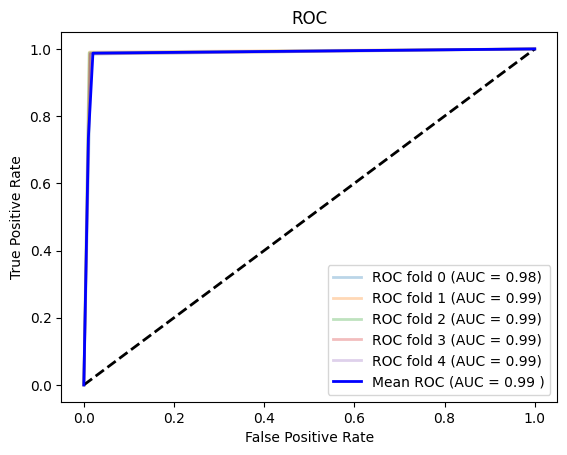

In [ ]:
from sklearn.svm import SVC

# Create the SVM classifier
SVM_clf = SVC()

for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(X_vectors, Y, test_size=0.30, random_state=i)
  # Train the classifier
  SVM_clf.fit(x_train, y_train)
  # Make predictions
  y_pred = SVM_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i, accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
[[1544   23]
 [  18 1415]]


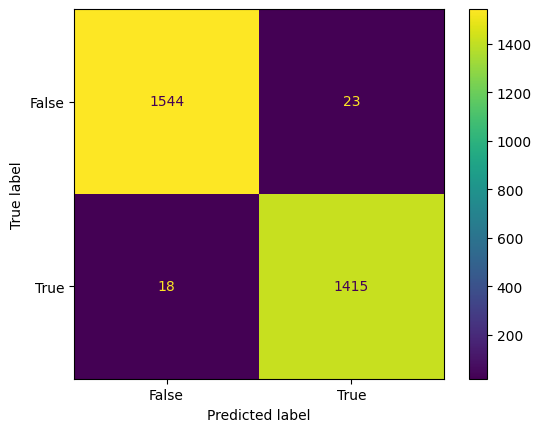

In [ ]:
#  confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, SVM_clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

**Random Forest(RF)**

Fold: 0 : 0.9686666666666667
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1481
           1       0.97      0.97      0.97      1519

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000

Fold: 1 : 0.9723333333333334
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1490
           1       0.97      0.98      0.97      1510

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000

Fold: 2 : 0.968
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1534
           1       0.96      0.97      0.97      1466

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000


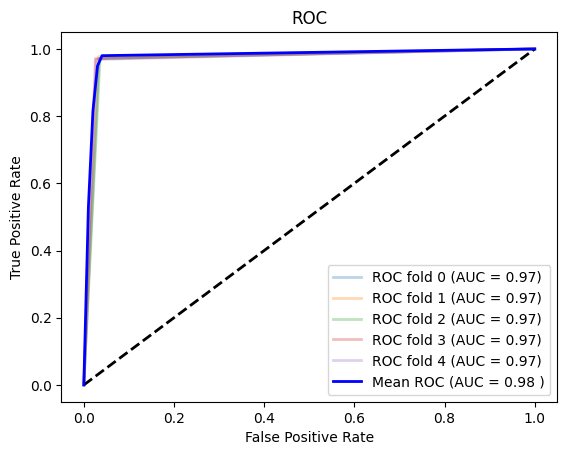

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create the Random Forest classifier
rf_clf = RandomForestClassifier()

for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(X_vectors, Y, test_size=0.30, random_state=i)
  # Train the classifier
  rf_clf.fit(x_train, y_train)
  # Make predictions
  y_pred = rf_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i,":", accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
[[1524   43]
 [  45 1388]]


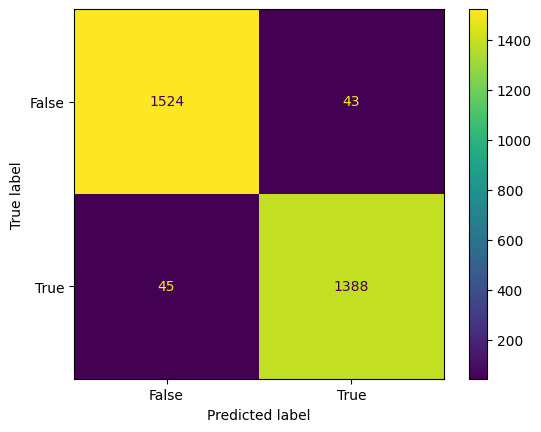

In [ ]:
#  confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, rf_clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

**Decision Tree (DT)**

Fold: 0 : 0.9366666666666666
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1481
           1       0.94      0.94      0.94      1519

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000

Fold: 1 : 0.9456666666666667
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1490
           1       0.94      0.95      0.95      1510

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000

Fold: 2 : 0.9356666666666666
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1534
           1       0.93      0.94      0.93      1466

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.

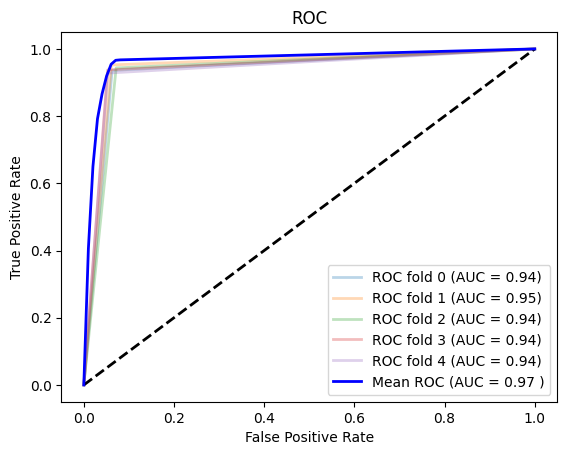

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Create the Random Forest classifier
dt_clf = DecisionTreeClassifier()

for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(X_vectors, Y, test_size=0.30, random_state=i)
  # Train the classifier
  dt_clf.fit(x_train, y_train)
  # Make predictions
  y_pred = dt_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i,":", accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
[[1484   83]
 [ 103 1330]]


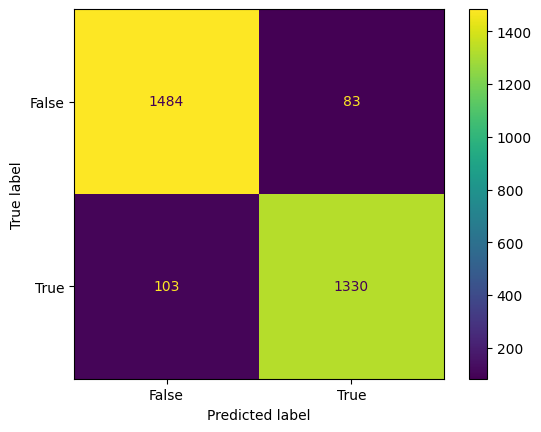

In [ ]:
#  confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, dt_clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

**Naive Bayes**

Fold: 0 : 0.925
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1481
           1       0.89      0.97      0.93      1519

    accuracy                           0.93      3000
   macro avg       0.93      0.92      0.92      3000
weighted avg       0.93      0.93      0.92      3000

Fold: 1 : 0.9236666666666666
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1490
           1       0.89      0.97      0.93      1510

    accuracy                           0.92      3000
   macro avg       0.93      0.92      0.92      3000
weighted avg       0.93      0.92      0.92      3000

Fold: 2 : 0.9263333333333333
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1534
           1       0.89      0.97      0.93      1466

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000


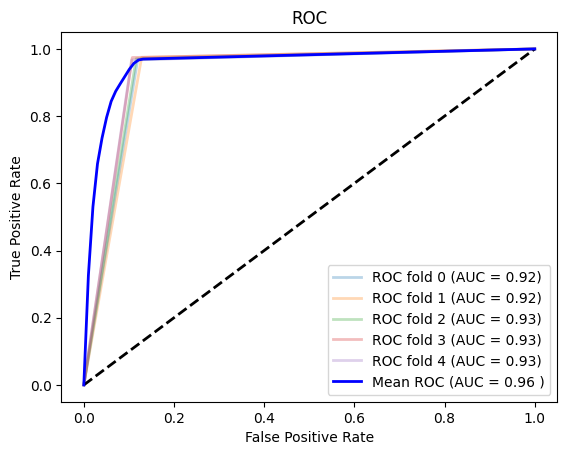

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create the Naive Bayes classifier
NB_clf = GaussianNB()

for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(X_vectors, Y, test_size=0.30, random_state=i)

  # Convert sparse matrices to dense matrices
  #x_train = x_train.toarray()
  #x_test = x_test.toarray()

  # Train the classifier
  NB_clf.fit(x_train, y_train)
  # Make predictions
  y_pred = NB_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i,":", accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
[[1401  166]
 [  47 1386]]


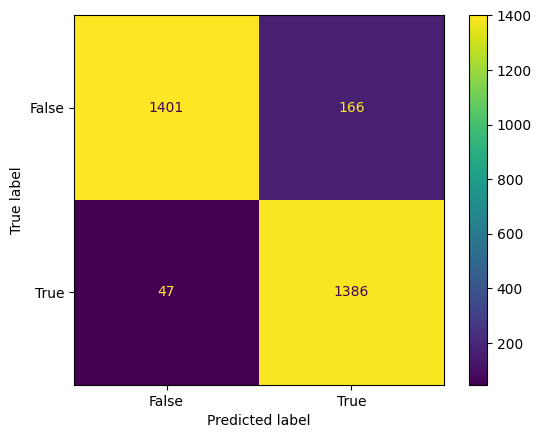

In [ ]:
#  confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, NB_clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

**Gradient Boosting (GB)**

Fold: 0 : 0.9733333333333334
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1481
           1       0.97      0.98      0.97      1519

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000

Fold: 1 : 0.9783333333333334
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1490
           1       0.97      0.98      0.98      1510

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

Fold: 2 : 0.9776666666666667
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1534
           1       0.97      0.98      0.98      1466

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.

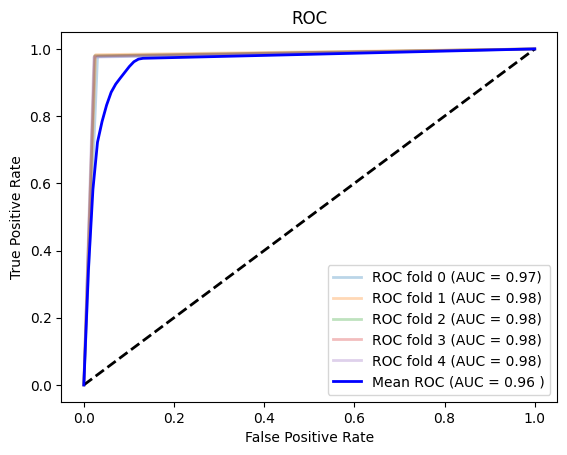

In [ ]:
#Gradient Boosting Algorithm
from sklearn.ensemble import GradientBoostingClassifier
GB_clf = GradientBoostingClassifier(random_state=0)

for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(X_vectors, Y, test_size=0.30, random_state=i)
  # Train the classifier
  GB_clf.fit(x_train, y_train)
  # Make predictions
  y_pred = GB_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i,":", accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
[[1532   35]
 [  35 1398]]


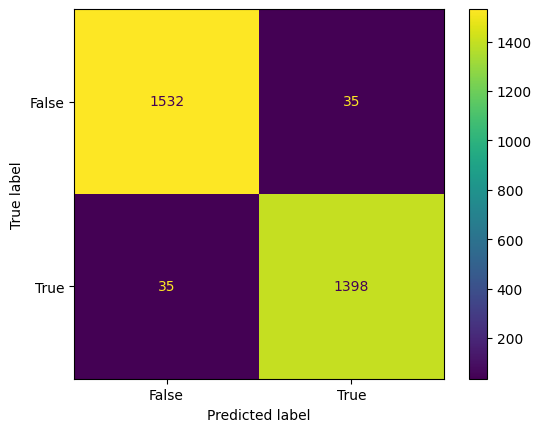

In [ ]:
#  confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, GB_clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()